# Perceptron for Binary Classification

이번 과제는 간단한 더미 데이터를 이용해 이진 분류 문제(Binary Classification)를 직접 풀어보는 것을 목표로 합니다. 먼저 임의의 난수(random) 데이터를 생성한 후, 이를 퍼셉트론(perceptron) 알고리즘에 학습시킵니다. 학습 시킬때는 경사하강법(Gradient Descent)을 통해 학습시킬 것입니다.

먼저 이번 과제에서 사용할 패키지들을 가져옵니다. numpy와 시각화를 위한 matplotlib면 충분합니다.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

임의의 난수(random), 무작위 데이터를 만들어봅시다. 실행할 때마다 데이터의 값들이 달라질 수 있으니 주의해주세요.

In [3]:
# -1 ~ 1사이의 Uniform 분포(각 값들이 나올 확률이 동일한 분포)에서 x1을 정의합니다
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([-0.93594662,  0.30436502,  0.38693841,  0.6110103 ,  0.99630759,
       -0.59991863,  0.64732047,  0.71355311, -0.55778032,  0.26397478])

In [4]:
# -1 ~ 1사이의 Uniform 분포(각 값들이 나올 확률이 동일한 분포)에서 x2을 정의합니다
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.26959579,  0.89076393,  0.5379693 , -0.35255923,  0.24272964,
        0.72246689,  0.09552124,  0.62432859, -0.91245802,  0.64363493])

In [5]:
# 간단한 식을 이용한 다음
y = 0.3 * x1 + 0.5 * x2 + 0.1

y = (y > 0)

print(y.shape)
y[0:10]

# 따라서 y는 0보다 클 때 True, 작거나 같을 때 False를 갖게 됩니다
# 곧 두 가지 범주를 가진 것이죠

(100,)


array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True])

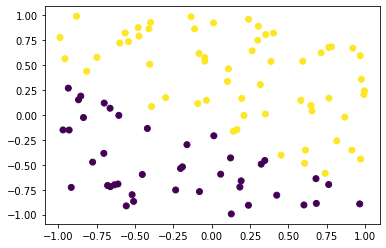

In [6]:
plt.scatter(x1, x2, c=y) # 이를 시각화해보면 다음과 같이 분포하고 있음을 확인할 수 있습니다

### Sigmoid

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

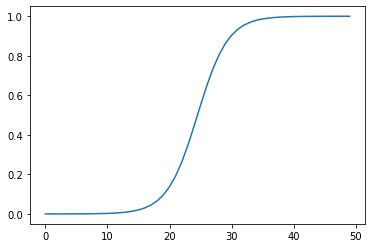

In [8]:
xx = np.linspace(-10, +10)  # -10 ~ +10까지 랜덤한 균등한 값
yy = sigmoid(xx)

plt.plot(yy)

### Gradient Descent

이제 본격적으로 학습을 시작해봅시다. 두 가지의 변수 x1과 x2를 가지고 있으니 총 세 개의 값, w1, w2, b를 학습해야 합니다. 이를 먼저 정의하고, 경사하강법을 이용해 학습시켜줍니다. 학습을 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기서는 굳이 그럴 필요없이 정확도가 0.95에 도달하면 학습을 종료하도록 하겠습니다.

In [9]:
# 학습 횟수를 몇 번으로 할지 정합니다.
num_epoch = 100

# learning_rate 하이퍼패러미터 값을 정합니다.
learning_rate = 1.0

# 학습해야 하는 가중치(w)를 먼저 정의해줍니다.
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

# 앞서 지정한 num_epoch 만큼 학습을 시작합니다.
for epoch in range(num_epoch):
    # 먼저 주어진 데이터와 weight, bias를 활용하여 y의 예측값을 구합니다.
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = (y_predict >= 0.5)
    
    accuracy = (y == predict).mean()
    
    if epoch % 10 == 0:
        print(f"{epoch} accuracy = {accuracy}")
    
    if accuracy == 1.0 :
        break
        
    # Cost Function을 편미분한 결과를 바탕으로 weight와 bias를 update 해줍니다.
    # 우리는 이를 Gradient Descent라고 부릅니다.
    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()  # cross-entropy loss의 편미분이 MSE의 편미분과 같아서 
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()  # 안바꿔도 된다.
    b = b - learning_rate * (y_predict - y).mean()

print('---' * 10)
print(f"{epoch} accuracy = {accuracy}")

0 accuracy = 0.41
10 accuracy = 0.97
20 accuracy = 0.98
30 accuracy = 0.98
40 accuracy = 0.99
50 accuracy = 0.99
60 accuracy = 0.99
70 accuracy = 0.99
80 accuracy = 0.99
90 accuracy = 0.99
------------------------------
99 accuracy = 0.99


In [10]:
import pandas as pd
result = {
    'x1' : x1,
    'x2' : x2,
    'y(actual)' : y,
    'y(predict)' : predict,
}

pd.DataFrame(result)

,x1,x2,y(actual),y(predict)
0,-0.935947,0.269596,False,False
1,0.304365,0.890764,True,True
2,0.386938,0.537969,True,True
3,0.611010,-0.352559,True,True
4,0.996308,0.242730,True,True
...,...,...,...,...
95,-0.611762,-0.692352,False,False
96,-0.203817,-0.536418,False,False
97,-0.235479,-0.752576,False,False
98,-0.565124,0.823281,True,True


### Visualize Decision Boundary

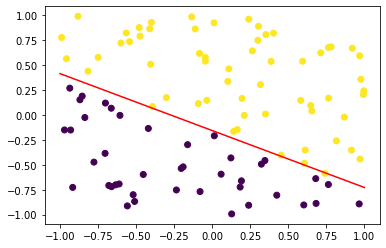

In [11]:
xx = np.linspace(-1.0, +1.0)
yy = -(w1 *  xx + b) / w2

plt.scatter(x1, x2, c=y)

plt.plot(xx, yy, c='r')